# RGB to Wavelength
Experiments on converting RGB values from PL images to wavelengths.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the raw quantum efficiency data
# first column is wavelength in nm
# remaining columns are the %QE of the color sensor
qe_df = pd.read_csv('../frgtrainview/analysis/CS165CU_Quantum_Efficiency.csv', header=2).dropna()
qe_df

,Wavelength (nm),Blue,Green,Red
0,400.0,29.08381,5.51529,6.85800
1,405.0,33.02385,5.05232,6.01200
2,410.0,36.23982,4.56168,5.20900
3,415.0,39.10839,4.11991,4.55300
4,420.0,41.53590,3.74965,4.06200
...,...,...,...,...
116,980.0,4.57946,4.23049,4.39953
117,985.0,4.16327,3.84786,4.01697
118,990.0,3.77307,3.49821,3.67050
119,995.0,3.38447,3.15649,3.33007


In [4]:
# convert QE percents to RGB
# a 100% QE = 255 channel

rgb_table = pd.DataFrame()
rgb_table['Wavelength'] = qe_df['Wavelength (nm)']

for c in ['Blue', 'Green', 'Red']:
    qe_min = qe_df[c].min()
    qe_max = qe_df[c].max()

    x = (qe_df[c]/100) * 255
    rgb_table[c] = x

rgb_table

,Wavelength,Blue,Green,Red
0,400.0,74.163715,14.063990,17.487900
1,405.0,84.210818,12.883416,15.330600
2,410.0,92.411541,11.632284,13.282950
3,415.0,99.726394,10.505771,11.610150
4,420.0,105.916545,9.561608,10.358100
...,...,...,...,...
116,980.0,11.677623,10.787750,11.218801
117,985.0,10.616338,9.812043,10.243273
118,990.0,9.621329,8.920435,9.359775
119,995.0,8.630399,8.049050,8.491679


Text(0.5, 0, 'Wavelength (nm)')

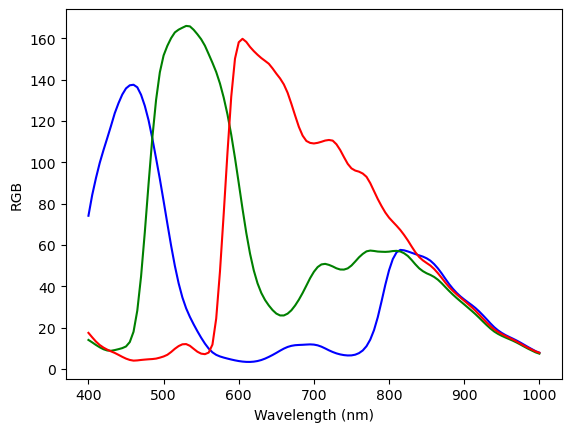

In [5]:
plt.plot(rgb_table['Wavelength'], rgb_table['Blue'], color='blue')
plt.plot(rgb_table['Wavelength'], rgb_table['Green'], color='green')
plt.plot(rgb_table['Wavelength'], rgb_table['Red'], color='red')
plt.ylabel('RGB')
plt.xlabel('Wavelength (nm)')

In [6]:
# determine wavelength that maps "best" to a given rgb point
# based on lowest distance between the rgb points
# TODO: maybe QE curve interpolation to get finer wavelength data?

x = (200, 100, 20)

def distance(rgb1, rgb2):
    # use squared euclidean distance
    return np.sum(np.square(rgb1 - rgb2), axis=-1) # axis=-1 to vectorize

print(np.array([x] * 100).shape)
print(distance(np.array([x] * 100), x))

# closest = rgb_table[['Blue', 'Green', 'Red']].apply(lambda row: distance(x, row), axis=1).nsmallest(1)
# closest.name = 'distance'
# temp = rgb_table.loc[closest.index]
# temp = temp.join(closest)
# temp

(100, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
rgb_table_arr = rgb_table[['Red', 'Green', 'Blue']].to_numpy()

def rgb_to_wavelength(rgb, distance_func=distance):
    closest = np.argmin(distance_func(rgb_table_arr, rgb))

    return rgb_table['Wavelength'].loc[closest]

In [8]:
import cv2

pd.set_option('display.max_rows', 130)

hsv_table = np.uint8(rgb_table[['Red', 'Green', 'Blue']].to_numpy())
hsv_table = np.expand_dims(hsv_table, axis=1)
hsv_table = cv2.cvtColor(hsv_table, cv2.COLOR_RGB2HSV)
hsv_table = hsv_table.squeeze()
hsv_table = pd.DataFrame(hsv_table, columns=['Hue', 'Saturation', 'Value'])
hsv_table.insert(0, 'Wavelength', rgb_table['Wavelength'])
hsv_table

,Wavelength,Hue,Saturation,Value
0,400.0,122,207,74
1,405.0,121,219,84
2,410.0,121,225,92
3,415.0,120,229,99
4,420.0,120,233,105
5,425.0,120,237,111
6,430.0,120,238,117
7,435.0,119,240,123
8,440.0,119,243,128
9,445.0,119,245,132


In [17]:
hsv_table_arr = hsv_table[['Hue', 'Saturation', 'Value']].to_numpy()

def hsv_distance(hsv1, hsv2):
    # weight the hue distance more than saturation or value
    diff = np.abs(hsv1 - hsv2)
    diff[:, 0] = np.square(diff[:, 0])
    return np.sum(diff, axis=-1)


def hsv_to_wavelength(hsv, distance_func=hsv_distance):
    closest = np.argmin(distance_func(hsv_table_arr, hsv))

    return hsv_table['Wavelength'].loc[closest]

In [10]:
rgb_to_wavelength((0, 100, 200))

475.0

In [11]:
%%timeit
rgb_to_wavelength((0, 100, 200))

20.7 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
from frgpascal.analysis.processing import load_all
from natsort import index_natsorted

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

In [13]:
# load the images
chardir = '../data/output/20221027_B13-char/Characterization'
_, rawdf = load_all_sorted(chardir)

Loading data:   0%|          | 0/32 [00:00<?, ?sample/s]/home/kcw/miniconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:105: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:   6%|▋         | 2/32 [00:01<00:15,  1.88sample/s]/home/kcw/miniconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:105: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 32/32 [00:19<00:00,  1.60sample/s]


In [14]:
import cv2

pl = rawdf['plimg_0'].apply(lambda x: np.uint8(x * 255)) # convert to 0-255 and downsample
pl.head(1)

0    [[[254, 178, 44], [254, 176, 45], [254, 183, 0...
Name: plimg_0, dtype: object

(1080, 1440, 3)
(1080, 1440)


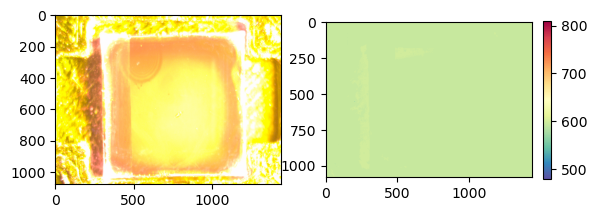

In [15]:
i=0

print(pl[i].shape)
wl = np.apply_along_axis(rgb_to_wavelength, 2, pl[i]) # TODO: vectorize
print(wl.shape)
fig, ax = plt.subplots(1,2)
ax[0].imshow(pl[i])
im = ax[1].imshow(wl, cmap=plt.cm.Spectral_r)
plt.colorbar(im, ax = ax[1], fraction = 0.035)

(1080, 1440)


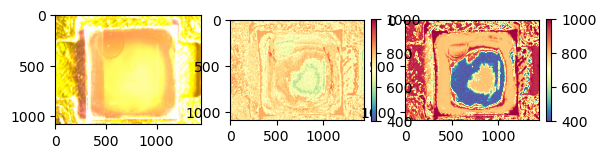

In [19]:
# now try hsv
i=0

hsv_img = cv2.cvtColor(pl[i], cv2.COLOR_RGB2HSV)
wl = np.apply_along_axis(lambda hsv: hsv_to_wavelength(hsv, distance), 2, hsv_img) # simple euclidean distance
wl2 = np.apply_along_axis(lambda hsv: hsv_to_wavelength(hsv, hsv_distance), 2, hsv_img) # more hue-weighted distance
print(wl.shape)
fig, ax = plt.subplots(1,3)
ax[0].imshow(pl[i])
im = ax[1].imshow(wl, cmap=plt.cm.Spectral_r)
plt.colorbar(im, ax = ax[1], fraction = 0.035)
im = ax[2].imshow(wl2, cmap=plt.cm.Spectral_r)
plt.colorbar(im, ax = ax[2], fraction = 0.035)
ax[0].set_title('Image')
ax[1].set_title('Euclidean HSV diff')
ax[2].set_title('Hue-Weighted HSV diff')

Text(0.5, 1.0, 'test')